In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collecting

In [3]:
all_df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/2-Faza-Grace/refs/heads/master/Data%20fix/ispu_dki_all.csv')
all_df.head(5)

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


### Data Cleaning

In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB


In [5]:
all_df['tanggal'] = pd.to_datetime(all_df['tanggal'])

In [6]:
missing_values = all_df.isna().sum()
missing_values[missing_values > 0]

pm10         160
pm25        3903
so2           19
co             8
o3             5
no2            8
critical       1
dtype: int64

Text(0.5, 1.0, 'Feature Correlation')

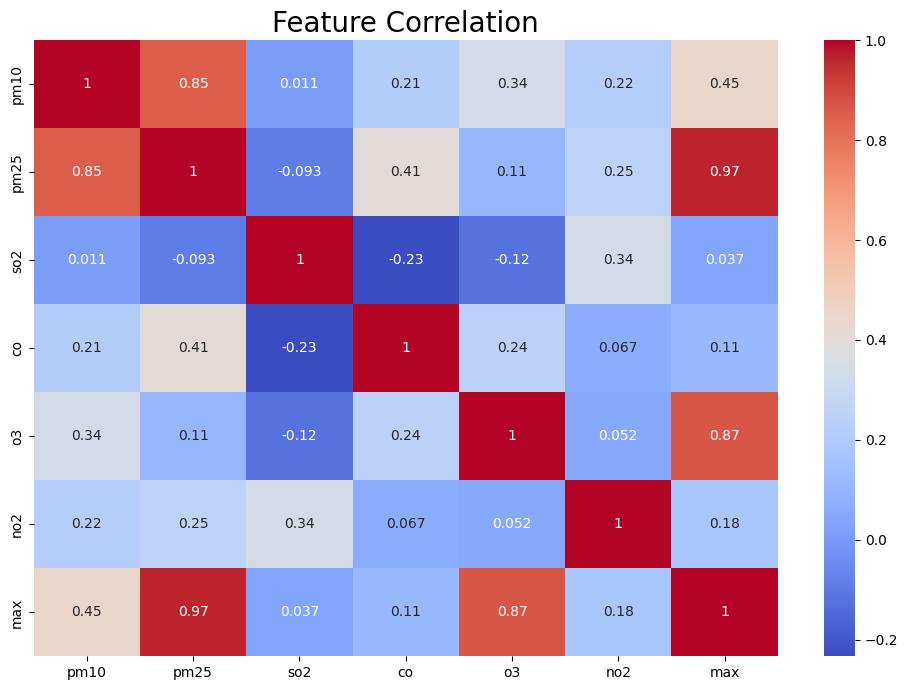

In [8]:
numeric_features = all_df.select_dtypes(include='number').columns
plt.figure(figsize=(12,8))
sns.heatmap(all_df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation', fontsize=20)

In [9]:
all_df['pm10'] = all_df['pm10'].fillna(all_df['pm10'].median())

In [10]:
all_df['so2'] = all_df['so2'].fillna(all_df['so2'].median())

In [11]:
all_df['co'] = all_df['co'].fillna(all_df['co'].median())

In [12]:
all_df['o3'] = all_df['o3'].fillna(all_df['o3'].median())

In [13]:
all_df['no2'] = all_df['no2'].fillna(all_df['no2'].median())

In [14]:
all_df = all_df[all_df['categori'] != 'TIDAK ADA DATA']

In [15]:
print(f'Data yang memiliki duplikat: {all_df.duplicated().sum()}')

Data yang memiliki duplikat: 0


In [16]:
all_df["critical"] = all_df[["pm10", "so2", "co", "o3", "no2"]].idxmax(axis=1)

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_35996\3728239979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df["critical"] = all_df[["pm10", "so2", "co", "o3", "no2"]].idxmax(axis=1)


In [17]:
all_df.drop(columns='pm25', inplace=True)

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_35996\407333700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df.drop(columns='pm25', inplace=True)


In [18]:
all_df.describe(include='all')

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
count,4625,4625,4625.000000,4625.000000,4625.000000,4625.000000,4625.000000,4625.000000,4625,4625
unique,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,5,5
top,NaN,DKI4 (Lubang Buaya),NaN,NaN,NaN,NaN,NaN,NaN,o3,SEDANG
freq,NaN,1592,NaN,NaN,NaN,NaN,NaN,NaN,2925,2574
mean,2016-06-23 07:15:53.513513728,NaN,65.049514,28.179243,30.261622,86.579243,18.119135,99.453622,NaN,NaN
min,2010-01-01 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,NaN,NaN
25%,2013-03-05 00:00:00,NaN,54.000000,18.000000,21.000000,51.000000,13.000000,70.000000,NaN,NaN
50%,2016-05-04 00:00:00,NaN,64.000000,27.000000,29.000000,78.000000,17.000000,91.000000,NaN,NaN
75%,2019-07-23 00:00:00,NaN,75.000000,34.000000,37.000000,110.000000,21.000000,118.000000,NaN,NaN
max,2023-11-30 00:00:00,NaN,179.000000,126.000000,134.000000,314.000000,134.000000,314.000000,NaN,NaN


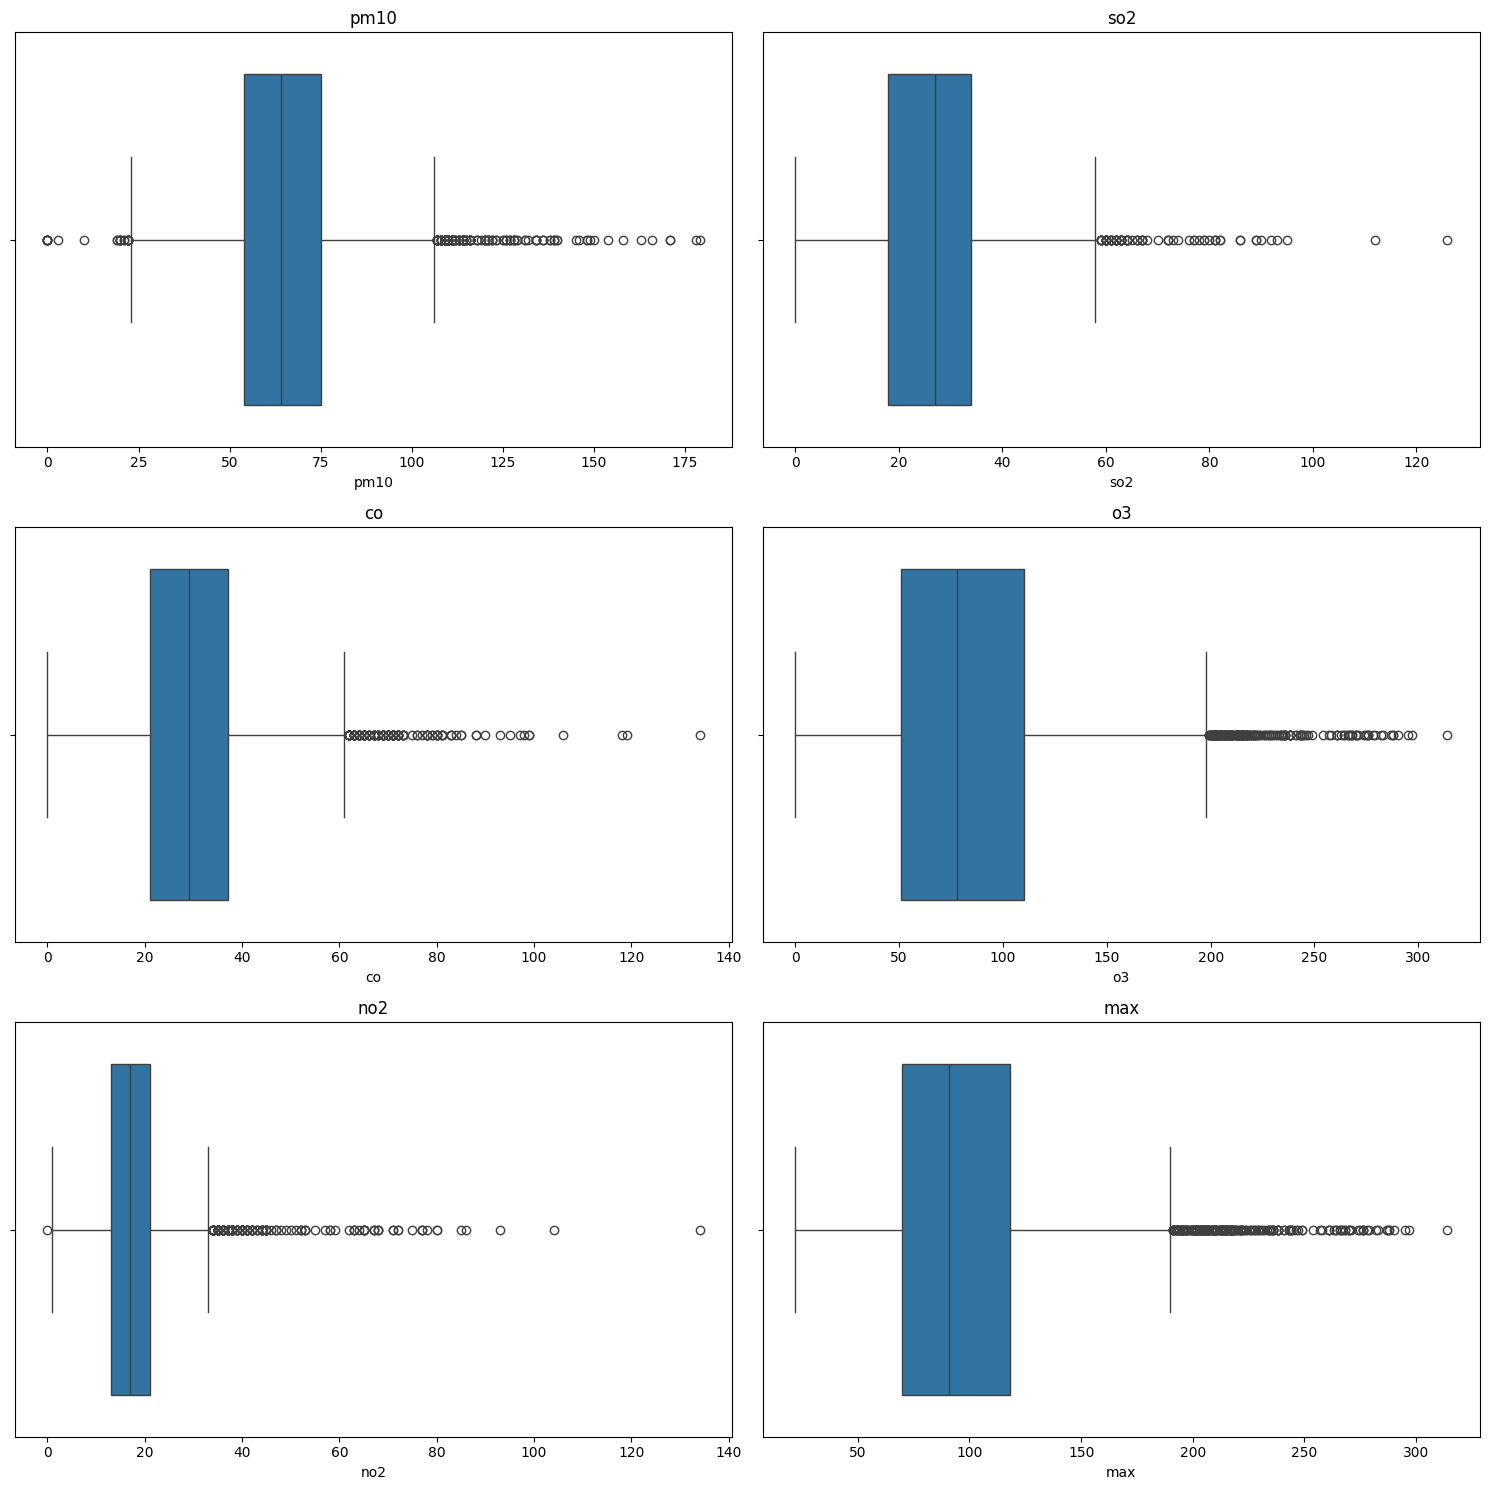

In [19]:
numeric_features = all_df.select_dtypes(include='number').columns

total_features = len(numeric_features)
n_cols = 2
n_rows = -(-total_features // n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=all_df[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [20]:
q1 = all_df[numeric_features].quantile(0.25)
q3 = all_df[numeric_features].quantile(0.75)
IQR = q3 - q1

condition = ~((all_df[numeric_features] < (q1 - 1.5 * IQR)) |
              (all_df[numeric_features] > (q3 + 1.5 * IQR))).any(axis=1)

filtered_numeric_df = all_df.loc[condition, numeric_features]

categorical_features = all_df.select_dtypes(include=['datetime', 'object']).columns
all_df = pd.concat([filtered_numeric_df, all_df.loc[condition, categorical_features]], axis=1)

In [21]:
all_df.describe(include='all')

,pm10,so2,co,o3,no2,max,tanggal,stasiun,critical,categori
count,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926,3926,3926,3926
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DKI4 (Lubang Buaya),o3,SEDANG
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1252,2547,2367
mean,62.992104,27.193327,29.200968,79.888181,16.698421,91.461284,2016-07-02 15:49:58.471727104,NaN,NaN,NaN
min,23.000000,0.000000,0.000000,0.000000,1.000000,25.000000,2010-01-02 00:00:00,NaN,NaN,NaN
25%,53.000000,18.000000,21.000000,50.000000,13.000000,67.000000,2013-07-11 06:00:00,NaN,NaN,NaN
50%,64.000000,27.000000,29.000000,77.000000,16.000000,87.000000,2016-05-30 12:00:00,NaN,NaN,NaN
75%,73.000000,33.000000,37.000000,103.000000,20.000000,110.000000,2019-06-13 18:00:00,NaN,NaN,NaN
max,106.000000,58.000000,61.000000,190.000000,33.000000,190.000000,2023-11-29 00:00:00,NaN,NaN,NaN


In [22]:
all_df['categori'].value_counts()

categori
SEDANG         2367
TIDAK SEHAT    1289
BAIK            270
Name: count, dtype: int64

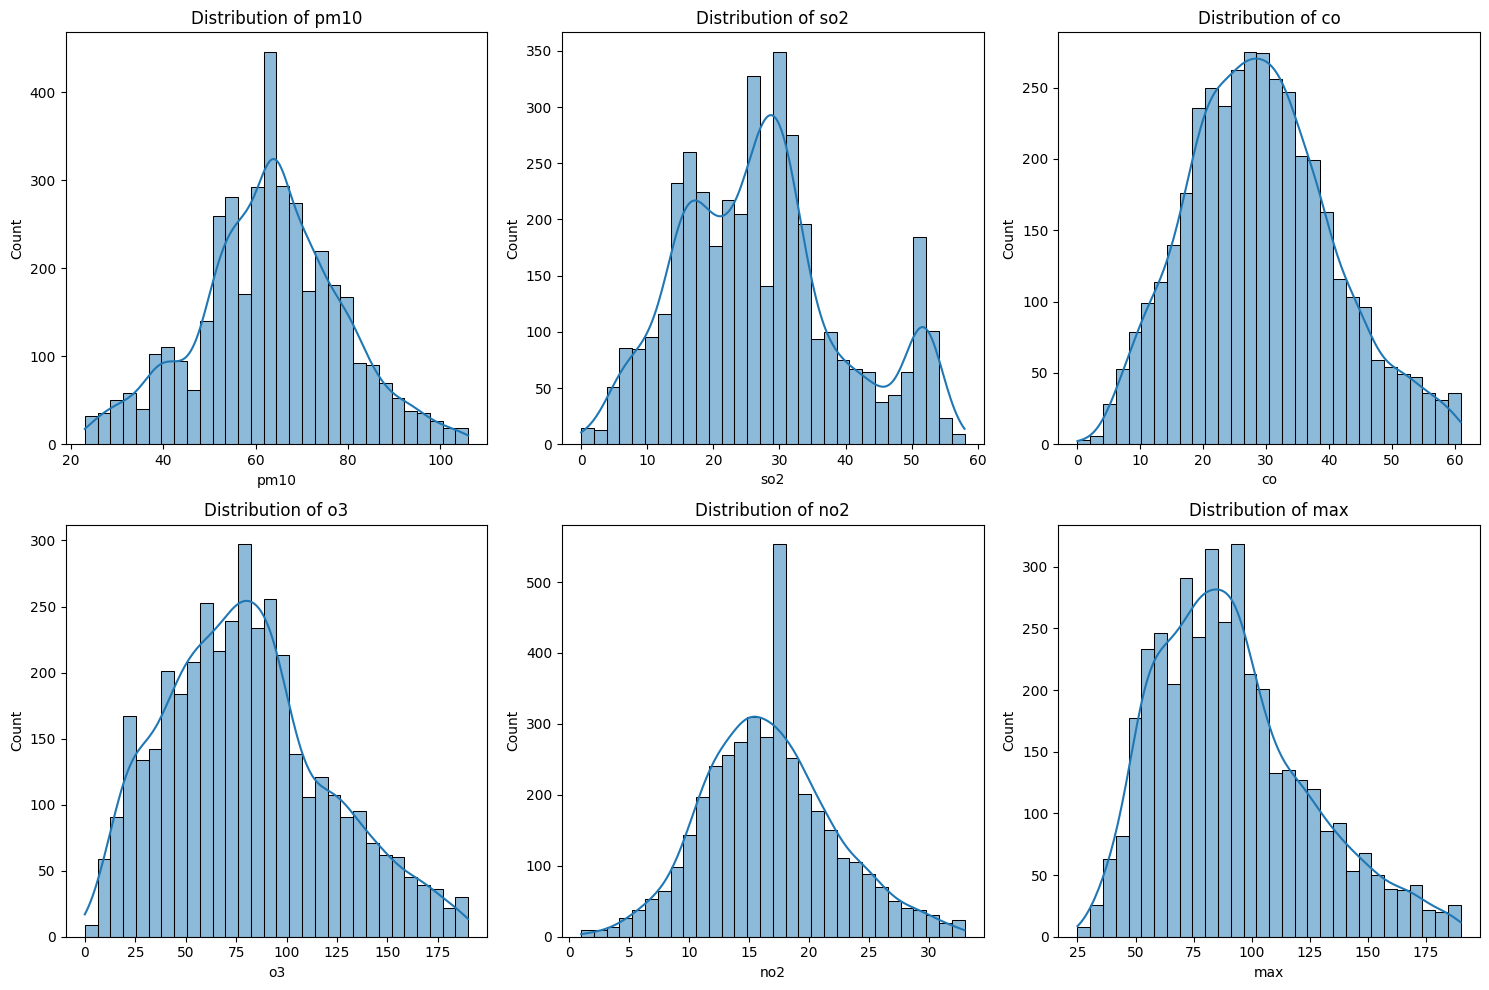

In [24]:
plt.figure(figsize=(15,10))
for i, column, in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(all_df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()